## PyTorch Computer Vision

In [1]:
## Computer vision libraries in pytorch
## Torchvision ==> base domain library.
## torchvision.datasets ==> get datasets and data loading functions.
## torchvision.models ==> getting pretrained models.
## torchvision.transform ==> Functions for manipulating your vision dataset.
## torch.util.data.Dataset ==> base dataset class for pytorch.
## torch.util.data.Dataloader ==> Ctraye a python iterable over a dataset.

In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torch.utils.data import DataLoader
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__)

2.3.0+cpu
0.18.0+cpu


In [3]:
## Getting a dataset :: fashionMNIST 
train_set = datasets.FashionMNIST(
    root = 'data',
    train = True,
    download = True,
    transform  = ToTensor(),
    target_transform = None
)
test_set = datasets.FashionMNIST(
    root = 'data',
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None
)

In [4]:
print(train_set)

Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
len(train_set), len(test_set)

(60000, 10000)

In [6]:
image, label = train_set[0]

In [7]:
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [8]:
print(train_set.classes)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [9]:
class_to_idx = train_set.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [10]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

(-0.5, 27.5, 27.5, -0.5)

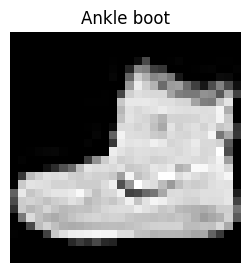

In [11]:
plt.figure(figsize=(5,3))
plt.imshow(image.squeeze(), cmap = 'gray')
plt.title(train_set.classes[label])
plt.axis(False)

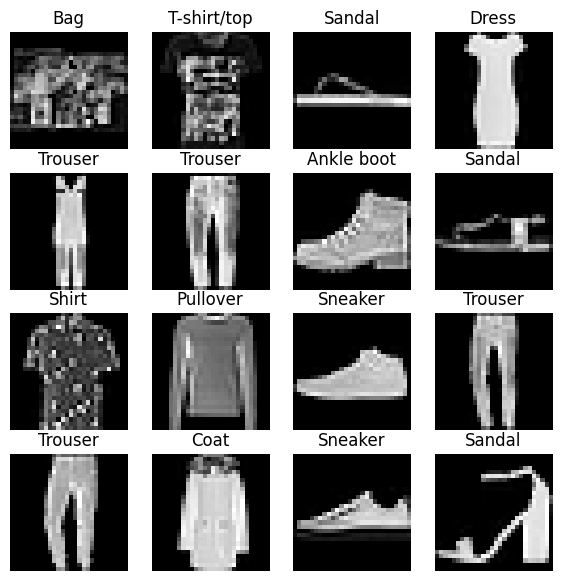

In [12]:
fig = plt.figure(figsize=(7,7))
for i in range(1,17):
    random_idx = torch.randint(0, len(train_set), size=[1]).item()
    img, label = train_set[random_idx]
    fig.add_subplot(4,4,i)
    plt.imshow(img.squeeze(), cmap ='gray')
    plt.title(train_set.classes[label])
    plt.axis(False)

In [13]:
train_loader = DataLoader(train_set, batch_size = 32, shuffle = True)
test_loader = DataLoader(test_set, batch_size = 32, shuffle = False)
train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x7fe689111940>,
 <torch.utils.data.dataloader.DataLoader at 0x7fe689111ac0>)

In [14]:
len(train_loader), len(test_loader)

(1875, 313)

In [15]:
## Check what inside the data_loader 
train_feature_batch, train_label_batch = next(iter(train_loader))
train_feature_batch.shape, train_label_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

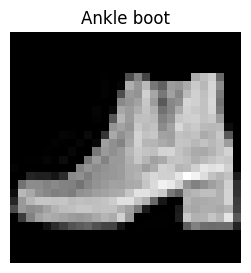

In [16]:
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_label_batch[random_idx]
plt.figure(figsize=(5,3))
plt.imshow(img.squeeze(), cmap = 'gray')
plt.title(train_set.classes[label])
plt.axis(False)

In [17]:
## Model creation
## New layer ==> flatten layer

flatten_model = nn.Flatten()

x = train_feature_batch[0]

output = flatten_model(x) ##  Forward pass
## Pass the value to the flatten model
x.shape, output.shape, output

(torch.Size([1, 28, 28]),
 torch.Size([1, 784]),
 tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
          0.0353, 0.0392, 0.0039, 0.0588, 0.2627, 0.1059, 0.0039, 0.0392, 0.0275,
          0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353, 0.0353,
          0.0353, 0.0353, 0.0353, 0.0157, 0.1412, 0.0706, 0.1843, 0.0941, 0.0039,
          0.0392, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353,
          0.0353, 0.0353, 0.0353, 0.0392, 0.0235, 0.0039, 0.0000, 0.1843, 0.0745,
          0.0275, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.0353,
          0.0353, 0.0353, 0.0353, 0.0157, 0.0627, 0.0510, 0.0000, 0.1020, 0.1490,
          0.0000, 0.0471, 0.0510, 0.0353, 0.0353,

In [18]:
output.squeeze(), output.shape

(tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0392, 0.0039, 0.0588, 0.2627, 0.1059, 0.0039, 0.0392, 0.0275,
         0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0157, 0.1412, 0.0706, 0.1843, 0.0941, 0.0039,
         0.0392, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0353, 0.0353, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0392, 0.0235, 0.0039, 0.0000, 0.1843, 0.0745,
         0.0275, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0275, 0.0353,
         0.0353, 0.0353, 0.0353, 0.0157, 0.0627, 0.0510, 0.0000, 0.1020, 0.1490,
         0.0000, 0.0471, 0.0510, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353, 0.0353,
         0.0000, 0.0000, 0.0

In [19]:
class FashionMnist(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
             nn.Flatten(),
             nn.Linear(784,10),
             nn.Linear(10,len(train_set.classes))
         )
    def forward(self, x):

        return self.layer_stack(x)

In [20]:
torch.manual_seed(42)
model = FashionMnist()
model

FashionMnist(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [21]:
# dummmy_x = torch.rand([1,1,28,28])
# model(dummmy_x)

In [22]:
# model.state_dict()

In [23]:
## Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [24]:
## Time our modeling code (time our experiments)
from timeit import default_timer as timer
def print_train_time(start:float, end : float, device : torch.device = None):
    total_time = end - start
    print(f' Train time :{total_time:.3f}')
    return total_time



In [25]:
start_time = timer()
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

 Train time :0.000


2.4003002181416377e-05

In [26]:
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epochs in range(epochs):
    train_loss = 0
    for X, y in train_loader:
        model.train()
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset) / 32
    model.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0
        acc = 0
        for X, y in test_loader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            correct = torch.eq(y, test_pred.argmax(dim=1)).sum().item()
            acc += (correct / len(test_pred)) * 100
        test_loss /= len(test_loader.dataset) / 32
        acc = acc / len(test_loader)
    print(f'loss :{train_loss}, test loss : {test_loss}, accuracy : {acc}')
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')


loss :0.9096061225732167, test loss : 0.630021870136261, accuracy : 78.63418530351437
loss :0.5573272641420365, test loss : 0.5449569225311279, accuracy : 81.13019169329074
loss :0.5026630536079407, test loss : 0.5144971013069153, accuracy : 81.9988019169329
 Train time :29.421


29.42074559899993

In [27]:
class FashionMNIST(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_stack = nn.Sequential(
             nn.Flatten(),
             nn.Linear(784,10),
            nn.ReLU(),
             nn.Linear(10,len(train_set.classes)),
            nn.ReLU()
         )
    def forward(self, x):

        return self.layer_stack(x)

In [28]:
torch.manual_seed(42)
model_1 = FashionMNIST()
model_1

FashionMNIST(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer_1 = torch.optim.SGD(model_1.parameters(), lr = 0.01)

In [30]:
torch.manual_seed(42)
start_time = timer()
epochs = 3
for epochs in range(epochs):
    train_loss = 0
    for X, y in train_loader:
        model_1.train()
        y_pred = model_1(X)
        loss = loss_function(y_pred, y)
        optimizer_1.zero_grad()
        loss.backward()
        optimizer_1.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset) / 32
    model_1.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0
        acc = 0
        for X, y in test_loader:
            test_pred = model_1(X)
            test_loss += loss_function(test_pred, y).item()
            correct = torch.eq(y, test_pred.argmax(dim=1)).sum().item()
            acc += (correct / len(test_pred)) * 100
        test_loss /= len(test_loader.dataset) / 32
        acc = acc / len(test_loader)
    print(f'loss :{train_loss}, test loss : {test_loss}, acuracy :{acc}')

    
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')


loss :1.4217857194582622, test loss : 1.123469351196289, acuracy :62.15055910543131
loss :1.033588265577952, test loss : 1.0017895829200745, acuracy :64.47683706070288
loss :0.9599610727945963, test loss : 0.9649250924110413, acuracy :65.40535143769968
 Train time :28.544


28.54351721800049

In [31]:
## CNN ==> Convolutional Neural Network  

In [32]:
class FashionMNIST_1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels= input_shape,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.Conv2d(in_channels= hidden_units,
                     out_channels= hidden_units,
                     kernel_size= 3,
                     stride= 1,
                     padding= 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size= 2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features= hidden_units*7*7 ,
                     out_features= output_shape)
        )
    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        return x

# class FashionMNIST_1(nn.Module):
#   """
#   Model architecture that replicates the TinyVGG
#   model from CNN explainer website.
#   """
#   def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
#     super().__init__()
#     self.conv_block_1 = nn.Sequential(
#         # Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
#         nn.Conv2d(in_channels=input_shape, 
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=1), # values we can set ourselves in our NN's are called hyperparameters
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )
#     self.conv_block_2 = nn.Sequential(
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=1),
#         nn.ReLU(),
#         nn.Conv2d(in_channels=hidden_units,
#                   out_channels=hidden_units,
#                   kernel_size=3,
#                   stride=1,
#                   padding=1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size=2)
#     )
#     self.classifier = nn.Sequential(
#         nn.Flatten(),
#         nn.Linear(in_features=hidden_units*7*7, # there's a trick to calculating this...
#                   out_features=output_shape)
#     )

#   def forward(self, x):
#     x = self.conv_block_1(x)
#     # print(f"Output shape of conv_block_1: {x.shape}")
#     x = self.conv_block_2(x) 
#     # print(f"Output shape of conv_block_2: {x.shape}")
#     x = self.classifier(x)
#     # print(f"Output shape of classifier: {x.shape}")
#     return x

In [33]:
torch.manual_seed(42)
model_2 = FashionMNIST_1(input_shape= 1,
                        hidden_units= 10,
                        output_shape= 10)
model_2

FashionMNIST_1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
loss_f = nn.CrossEntropyLoss()
optimizer_c = torch.optim.SGD(params= model_2.parameters(), lr = 0.1)

In [35]:
start_time = timer()
epochs = 3
for epochs in range(epochs):
    train_loss = 0
    for X, y in train_loader:
        model_2.train()
        y_pred = model_2(X)
        loss = loss_f(y_pred, y)
        optimizer_c.zero_grad()
        loss.backward()
        optimizer_c.step()
        train_loss += loss.item()
    train_loss /= len(train_loader.dataset) / 32
    model_2.eval()
    with torch.inference_mode():
        test_loss = 0
        test_acc = 0
        acc = 0
        for X, y in test_loader:
            test_pred = model_2(X)
            test_loss += loss_f(test_pred, y).item()
            correct = torch.eq(y, test_pred.argmax(dim=1)).sum().item()
            acc += (correct / len(test_pred)) * 100
        test_loss /= len(test_loader.dataset) / 32
        acc = acc / len(test_loader)
    print(f'loss :{train_loss}, test loss : {test_loss}, acuracy :{acc}')
end_time = timer()
print_train_time(start=start_time, end=end_time, device='cpu')

loss :0.5805472044189771, test loss : 0.3983541894197464, acuracy :85.21365814696486
loss :0.3559067510803541, test loss : 0.37313891242742536, acuracy :85.77276357827476
loss :0.31586879164973897, test loss : 0.32105596425533295, acuracy :88.29872204472844
 Train time :79.134


79.13372239700038